# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [69]:
import pandas as pd
import numpy as np

## Load the data into a DataFrame
# pd.read_csv('https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy')

Iowa_Booze = pd.read_csv('/Users/andrefbourque/Desktop/DSI/DSI_SM_01/projects/01-projects-weekly/project-03/Iowa_Liquor_sales_sample_10pct.csv')
df = pd.DataFrame(Iowa_Booze)

## Transform the dates if needed, e.g.
# df["Date"] = pd.to_datetime(df["Date"])

Iowa_Booze.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [70]:
#Remove $
df = df.replace({'\$': ''}, regex=True)
df.head()


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [71]:
from datetime import datetime

Iowa_Booze['Date'] = pd.to_datetime(Iowa_Booze['Date'])
Iowa_Booze.dtypes
#review data types


Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [112]:
#Correcting data types
df["Sale (Dollars)"] = df["Sale (Dollars)"].astype(float)
#db[colname] = db[colname].astype(float)
df["State Bottle Cost"] = df["State Bottle Cost"].astype(float)
df["State Bottle Retail"] = df["State Bottle Retail"].astype(float)
df.head()


,Date,Store Number,City,Zip Code,County Number,Category,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9,1051100,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82,1011100,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7,1011200,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85,1071100,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99,1031080,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [72]:
# Drop bad values
df = df.dropna()
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [73]:
# Convert integers
df["County Number"] = df["County Number"].astype(int)
df["Category"] = df["Category"].astype(int)
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85,Story,1071100,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99,Wright,1031080,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


In [74]:
# Remove redundant columns
del df["Category Name"]
del df["Item Description"]
del df["County"]
del df["Vendor Number"]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9,1051100,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82,1011100,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7,1011200,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85,1071100,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99,1031080,35918,1750,7.20,10.80,12,129.60,21.0,5.55


In [ ]:
# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [114]:
# Determine which stores were open all of 2015
# Find the first and last sales date.

dates = df.groupby(by=["Store Number"], as_index=False)
dates = dates.agg({"Date": [np.min, np.max]})
dates.columns = [' '.join(col).strip() for col in dates.columns.values]
dates.head()


,Store Number,Date amin,Date amax
0,2106,01/07/2016,12/30/2015
1,2113,01/06/2016,12/29/2015
2,2130,01/07/2016,12/30/2015
3,2152,01/08/2015,12/30/2015
4,2178,01/06/2016,12/29/2015


In [133]:
# Filter out stores that opened or closed throughout the year
# You may want to save this step until you start modeling
lower_cutoff = pd.Timestamp(datetime(2015,1,1))
upper_cutoff = pd.Timestamp(datetime(2015,12,31))
#print(type(pd.to_datetime(dates["Date amin"])))
date_amin = pd.to_datetime(dates["Date amin"])
date_amax = pd.to_datetime(dates["Date amax"])
mask =((date_amin > lower_cutoff) & (date_amax < upper_cutoff))
#dates_amin = dates['Date amin'].astype(int)
#mask = (dates['Date amin'] < lower_cutoff) & (dates['Date amax'] > upper_cutoff)
#print(type(mask))
#print(mask)
good_stores = dates[mask]["Store Number"]
print(good_stores)
df = df[df["Store Number"].isin(good_stores)]
#print(type(dates['Date amin']))
df.head()

0       2106
1       2113
2       2130
3       2152
4       2178
5       2190
6       2191
7       2200
8       2205
9       2228
10      2233
11      2238
12      2248
13      2285
14      2290
15      2327
16      2353
17      2367
18      2413
19      2445
20      2448
21      2459
22      2460
23      2465
24      2475
25      2478
26      2487
27      2498
28      2500
29      2501
        ... 
1343    5179
1344    5180
1345    5181
1346    5182
1347    5183
1348    5185
1349    5186
1350    5187
1351    5188
1352    5189
1353    5190
1354    5191
1355    5192
1356    5193
1358    5196
1359    5198
1360    5199
1361    5201
1363    5203
1364    5204
1365    5205
1366    5206
1367    5207
1369    5212
1370    5213
1371    5215
1372    9001
1374    9010
1375    9013
1376    9018
Name: Store Number, dtype: int64


,Date,Store Number,City,Zip Code,County Number,Category,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Gallon


In [107]:
df[['City', 'Bottles Sold']].groupby('City').size().sort_values(ascending=False)
df.head()


,Date,Store Number,City,Zip Code,County Number,Category,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9,1051100,54436,750,4.50,6.75,12,81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82,1011100,27605,750,13.75,20.63,2,41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7,1011200,19067,1000,12.59,18.89,24,453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85,1071100,59154,1750,9.50,14.25,6,85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99,1031080,35918,1750,7.20,10.80,12,129.60,21.0,5.55


## Record your findings

Be sure to write out anything observations from your exploratory analysis.

In [ ]:
#Bottle volume does not correlate to the price of bottle. 

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

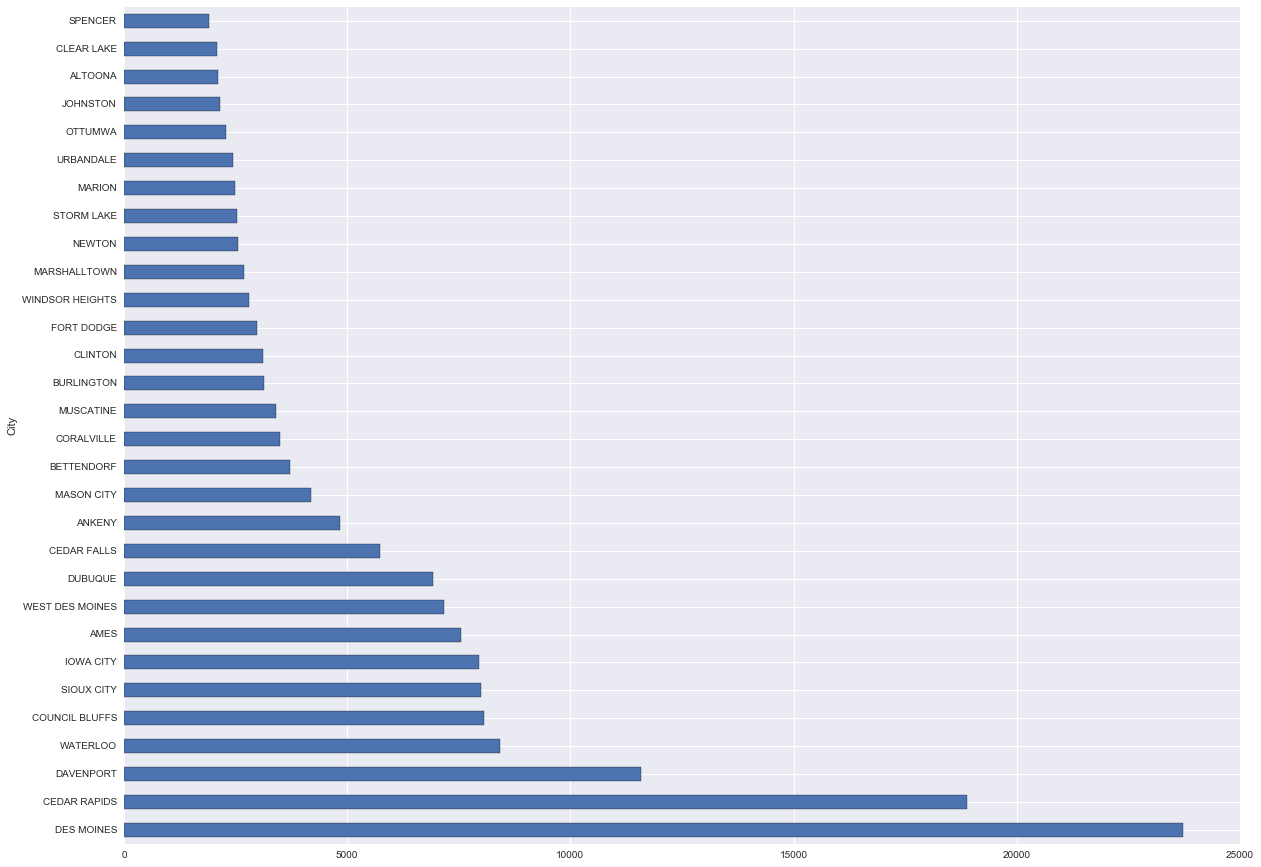

In [53]:
#sort by city
#df[['City', 'Bottles Sold']].groupby('City').size().sort_values(ascending=False).plot(kind='barh')
df[['City', 'Bottles Sold']].groupby('City').size().sort_values(ascending=False).head(30).plot(kind='barh', figsize=[20,15])

Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [113]:
# Margin
df["Margin"] = (df["State Bottle Retail"] - df["State Bottle Cost"]) * df["Bottles Sold"]
df["Price per Gallon"] = df["Sale (Dollars)"] / df["Volume Sold (Gallons)"]
df.head()

,Date,Store Number,City,Zip Code,County Number,Category,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margin,Price per Gallon
0,11/04/2015,3717,SUMNER,50674,9,1051100,54436,750,4.50,6.75,12,81.00,9.0,2.38,27.00,34.033613
1,03/02/2016,2614,DAVENPORT,52807,82,1011100,27605,750,13.75,20.63,2,41.26,1.5,0.40,13.76,103.150000
2,02/11/2016,2106,CEDAR FALLS,50613,7,1011200,19067,1000,12.59,18.89,24,453.36,24.0,6.34,151.20,71.507886
3,02/03/2016,2501,AMES,50010,85,1071100,59154,1750,9.50,14.25,6,85.50,10.5,2.77,28.50,30.866426
4,08/18/2015,3654,BELMOND,50421,99,1031080,35918,1750,7.20,10.80,12,129.60,21.0,5.55,43.20,23.351351


In [ ]:
# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [143]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
# specification of the linear model to create  a linear regression
#regr.fit(X_values,Y_Values)
lm = linear_model.LinearRegression() # specifing we are applying the linear regression
x_array = df.as_matrix(columns=["State Bottle Cost"])
y_array = df.as_matrix(columns=["State Bottle Retail"])

print(x_array) #can't get this to work

[]


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [ ]:
#http://bit.ly/28WM7zR

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [ ]:
#http://bit.ly/28WM7zR